Q2: Contrastive Language-Image Pretraining [6 points]
1. [1 point] Setup models. Load the ResNet-50 (RN50) model, initialized in two different ways:
(a) ImageNet pretraining (torchvision.models can be used, specifically look at IMAGENET1K_V1); and (b) OpenAI’s CLIP (see https://github.com/openai/CLIP).
Do the visual encoders have the same architecture? If not, please describe and explain the differences.
Hint: When you load the CLIP model, you will get both the vision and text encoders - be sure to differentiate between them as necessary.

In [1]:
!conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

Retrieving notices: ...working... done
Channels:
 - pytorch
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - cudatoolkit=11*
  - pytorch=1.7.1*

Current channels:

  - https://conda.anaconda.org/pytorch
  - defaults
  - https://conda.anaconda.org/conda-forge

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 358.3 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.5
    Uninstalling wcwidth-0.2.5:
      Successfully uninstalled wcwidth-0.2.5
  Cloning https://github.com/openai/CLIP.git to /private/var/folders/rr/z_5g06cd50s8dkxpl2f9tvnc0000gn/T/pip-req-build-fm2agziw
  Running command git clone --filter=blob:none --quiet https://github.co

In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 386.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 108.6 kB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.5/411.5 kB 220.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 202.6 kB/s eta 0:00:0000:0100:01


In [7]:
import torchvision.models as models
import clip
import torch

# Load ResNet-50 pretrained on ImageNet
resnet50_imagenet = models.resnet50(pretrained=True)

print("ResNet-50 model:\n", resnet50_imagenet)



/Users/sunayana/anaconda3/envs/newenvt/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/sunayana/anaconda3/envs/newenvt/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet-50 model:
 ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(

In [9]:
import clip

# Load the CLIP model with a ResNet-50 vision encoder
clip_model, preprocess = clip.load("RN50")

#extracting the image encoder
image_encoder = clip_model.visual

print(image_encoder)

ModifiedResNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU(inplace=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU(inplace=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU(inplace=True)
  (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), str

| **Component**          | **ResNet-50 (ImageNet)**                                                                             | **CLIP's Vision Encoder (ResNet-50)**                                              |
|------------------------|------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------|
| **Initial Convolution**| Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))                                     | Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))                   |
| **Batch Norm**         | BatchNorm2d(64)                                                                                     | BatchNorm2d(32)                                                                    |
| **ReLU Activation**    | ReLU(inplace=True)                                                                                  | ReLU(inplace=True)                                                                 |
| **Max/Avg Pooling**    | MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)                           | AvgPool2d(kernel_size=2, stride=2, padding=0)                                      |
| **Layer 1**            | Multiple Bottleneck layers, each with various configurations of Conv2d and BatchNorm2d operations    | Similar Bottleneck layers but with adjusted input/output dimensions and AvgPool    |
| **Layer 2**            | Multiple Bottleneck layers, similar to Layer 1 but for higher dimensions                            | Similar configuration with adjustments for smaller dimensional mappings            |
| **Layer 3**            | Bottleneck layers with larger dimensions and more complex downsample paths                          | Bottleneck layers adjusted to handle different tensor sizes with AvgPool2d layers  |
| **Layer 4**            | Advanced Bottleneck configurations for deep feature processing                                      | Reduced complexity in bottleneck layers to accommodate different processing needs  |
| **Final Pooling**      | AdaptiveAvgPool2d(output_size=(1, 1))                                                               | AttentionPool2d with Linear layers acting on feature vectors                        |
| **Output Linear Layer**| Linear(in_features=2048, out_features=1000, bias=True)                                              | More complex projection layers for matching text and image features in CLIP        |


**Architecture Comparison:**

Both use the ResNet-50 architecture, but there are modifications in the CLIP version:

**CLIP’s ResNet-50:** This model has been adapted for processing images in a manner that aligns with text data for joint training. This typically includes modifications at the output layer to interface with the text encoder and modifications in internal layer sizes and configurations to optimize for a broader range of visual features.


**Standard ResNet-50:** This model is optimized solely for image classification tasks based on the ImageNet dataset, focusing on categorizing images into 1000 classes without needing to align these with text.

2. **[1 point] Setup data. Understand the ImageNet challenge dataset (1000 labels of ILSVRC).**


(i) What label hierarchy is used in ImageNet?

(ii) What does a synset mean?

(iii) Could grouping objects based on synsets lead to problems for visual recognition?

(iv) State 3 types of visual differences we can expect to see in images with objects corresponding to the same synset.


**(i) Label Hierarchy:**

ImageNet uses the WordNet hierarchy, which groups images by synsets (synonym sets) based on semantic similarity in a lexical database of English.

**(ii) Synset Meaning:**

A synset is a group of synonymous words or phrases that express a specific concept, used in ImageNet to categorize images depicting the same concept.

**(iii) Potential Grouping Issues:**

Grouping by synsets could lead to:

Visual Ambiguity: Different objects within a synset may look very different.
Contextual Variability: The same object may appear in different contexts, affecting recognition.
Intra-class Variation: Significant differences in appearance, pose, or age within the same class.


**(iv) Types of Visual Differences:**

Shape Variability: Animals in the same family can vary greatly in shape.
Color Differences: Flowers of the same species can have multiple color forms.
Size and Scale: Vehicles like cars can range from compact models to SUVs.

3. [1 point] **Setup zero-shot CLIP.** 

Similar to the ImageNet pretrained RN50, set up CLIP to generate probability scores for the 1000 ImageNet categories.
Test it with a few example images to check that it identifies the correct object category. Hint: You may treat the cosine similarities as “logits”.

In [16]:
import clip
import PIL.Image
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize
import torch
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have CLIP installed and loaded
clip_model, preprocess = clip.load('RN50', device='cpu')

# Path to the LOC_synset_mapping.txt file
synset_file_path = 'LOC_synset_mapping.txt'

# Read the synset file and extract labels
imagenet_labels = []
with open(synset_file_path, 'r') as file:
    for line in file:
        parts = line.strip().split(' ', 1)
        if len(parts) > 1:
            imagenet_labels.append(parts[1])  # We only need the description part

# Ensure labels are loaded
print("Loaded", len(imagenet_labels), "labels")


Loaded 1000 labels


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


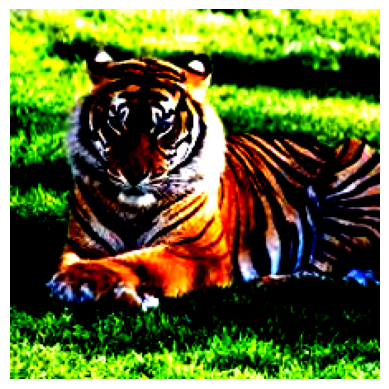

In [22]:
# Load example image
image_path = '3.jpeg'  # Replace with your image path
image = preprocess(PIL.Image.open(image_path)).unsqueeze(0).to("cpu")

# Prepare text prompts for ImageNet categories
text_prompts = [f"a photo of a {label}" for label in imagenet_labels]
text_tokens = clip.tokenize(text_prompts).to("cpu")

#displaying the image
plt.imshow(image[0].permute(1, 2, 0))
plt.axis('off')
plt.show()



In [23]:
# Calculate feature vectors
with torch.no_grad():
    image_features = clip_model.encode_image(image)
    text_features = clip_model.encode_text(text_tokens)

# Compute cosine similarities and take softmax
logits = (image_features @ text_features.T).softmax(dim=-1)

# Get top categories
top_probs, top_labels = logits.cpu().topk(5)

# Print top categories
for probability, label in zip(top_probs.squeeze(0), top_labels.squeeze(0)):
    print(f"{text_prompts[label]}: {probability.item():.4f}")


a photo of a web site, website, internet site, site: 0.0271
a photo of a tiger, Panthera tigris: 0.0247
a photo of a tiger cat: 0.0229
a photo of a Leonberg: 0.0131
a photo of a zebra: 0.0065


4. . [1.5 points] CLIP vs ImageNet pretraining. Pick 10 classes from ImageNet (not all from the same branch, e.g., not all dogs). For each class:

(i) Find 2 images that work well with CLIP, but not with ImageNet pretrained RN50. Reason about why this may be the case. From where did you get these images?

(ii) Find 1 image that works well with ImageNet pretraining but not CLIP. Reason about why this may be the case. From where did you get these images?


Note: For the purpose of this question, we will say that the model “works well” if it generates the correct category label within the top-5 highest scoring labels.
Hint: Reading the CLIP paper (https://arxiv.org/abs/2103.00020) can help you solve this question quickly as it shows examples where ImageNet does not work, but CLIP works.


In [31]:
!pip install bing-image-downloader


In [32]:
from bing_image_downloader import downloader

def download_bing_images(query, num_images):
    downloader.download(query, limit=num_images,  output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60)

categories = ["Eagle", "Taxi", "Pizza", "Violin", "Elephant", "Laptop", "Volcano", "Sneakers", "Clownfish", "Sunflower"]

for category in categories:
    download_bing_images(category, 1)


[%] Downloading Images to /Users/sunayana/Documents/GitHub/CV/assignment4/dataset/Eagle


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from http://sites.psu.edu/alouise/wp-content/uploads/sites/38740/2016/04/bald-eagle-4.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.
[%] Downloading Images to /Users/sunayana/Documents/GitHub/CV/assignment4/dataset/Taxi


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://cdn.vox-cdn.com/thumbor/kW2oGWABBjT6bMjnsT6L560Xyw0=/0x107:2040x1255/1600x900/cdn.vox-cdn.com/uploads/chorus_image/image/50164883/new-york-city-tlc-taxi-stock1_2040.0.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.
[%] Downloading Images to /Users/sunayana/Documents/GitHub/CV/assignment4/dataset/Pizza


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/e/ef/Fat_Slice_pepperoni_pizza_slice.JPG
[%] File 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


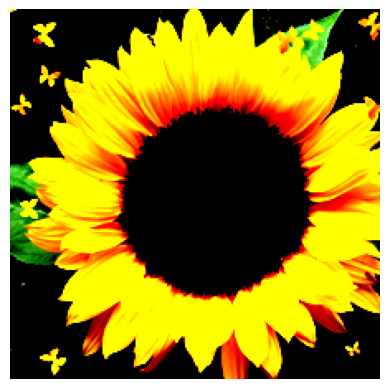

Predictions for dataset/Sunflower/Image_1.jpg
a photo of a web site, website, internet site, site: 0.0271
a photo of a bee: 0.0082
a photo of a daisy: 0.0080
a photo of a sunscreen, sunblock, sun blocker: 0.0043
a photo of a pinwheel: 0.0043
Predictions for dataset/Sunflower/Image_1.jpg
bucket, pail: 2.0922
plunger, plumber's helper: 1.9776
hook, claw: 1.9680
tennis ball: 1.8488
ladle: 1.7721


In [37]:
#testing the model with the created dataset

import os
import random

# Load example image
image_dir = 'dataset'
image_class = os.listdir(image_dir)
images = os.listdir(os.path.join(image_dir, random.choice(image_class)))
image_path = os.path.join(image_dir, random.choice(image_class), random.choice(images))
image = preprocess(PIL.Image.open(image_path)).unsqueeze(0).to("cpu")

# Prepare text prompts for ImageNet categories
text_prompts = [f"a photo of a {label}" for label in imagenet_labels]
text_tokens = clip.tokenize(text_prompts).to("cpu")

#displaying the image
plt.imshow(image[0].permute(1, 2, 0))
plt.axis('off')
plt.show()

# Calculate feature vectors
with torch.no_grad():
    image_features = clip_model.encode_image(image)
    text_features = clip_model.encode_text(text_tokens)
    
# Compute cosine similarities and take softmax
logits = (image_features @ text_features.T).softmax(dim=-1)

# Get top categories
top_probs, top_labels = logits.cpu().topk(5)

# Print top categories
print("Predictions for", image_path)

for probability, label in zip(top_probs.squeeze(0), top_labels.squeeze(0)):
    print(f"{text_prompts[label]}: {probability.item():.4f}")
    

#getting prediction for same image using resnet50 model

from PIL import Image
from torchvision import transforms

# Load and preprocess image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
image_tensor = preprocess(image).unsqueeze(0)

# Get prediction
with torch.no_grad():
    prediction = resnet50_imagenet(image_tensor)
    
# Get top categories
top_probs, top_labels = prediction.topk(5)

# Print top categories
print("Predictions for", image_path)

for probability, label in zip(top_probs.squeeze(0), top_labels.squeeze(0)):
    print(f"{imagenet_labels[label]}: {probability.item():.4f}")
    






In [46]:


image_path = '1.jpeg'




In [47]:
import torch
import clip
import torchvision.models as models
import torchvision.transforms as transforms
import time
import numpy as np
from PIL import Image

# Load CLIP model
device = "cpu"
clip_model, preprocess_clip = clip.load('RN50', device=device)
clip_model.eval()

# Load standard ResNet-50 model
resnet50 = models.resnet50(pretrained=True)
resnet50.eval()
resnet50.to(device)

# Define transform for ResNet-50
transform_resnet = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load and preprocess an image
image_path = '1.jpeg'
image_clip = preprocess_clip(Image.open(image_path)).unsqueeze(0).to(device)
image_resnet = transform_resnet(Image.open(image_path)).unsqueeze(0).to(device)

# Function to time model encoding
def time_model_encoding(model, image, is_clip=False, num_runs=100):
    times = []

    # Warm-up
    for _ in range(10):
        if is_clip:
            _ = model.encode_image(image)
        else:
            _ = model(image)

    # Timing
    start_time = time.time()
    for _ in range(num_runs):
        if is_clip:
            _ = model.encode_image(image)
        else:
            _ = model(image)
        end_time = time.time()
        times.append(end_time - start_time)
        start_time = time.time()

    return np.mean(times), np.std(times)

# Time both models
mean_clip, std_clip = time_model_encoding(clip_model, image_clip, is_clip=True)
mean_resnet, std_resnet = time_model_encoding(resnet50, image_resnet)

print(f"CLIP RN50 on CPU - Mean: {mean_clip:.6f} seconds, Std Dev: {std_clip:.6f} seconds")
print(f"ResNet-50 on CPU - Mean: {mean_resnet:.6f} seconds, Std Dev: {std_resnet:.6f} seconds")


CLIP RN50 on CPU - Mean: 0.041049 seconds, Std Dev: 0.001510 seconds
ResNet-50 on CPU - Mean: 0.031825 seconds, Std Dev: 0.002763 seconds
